<a href="https://colab.research.google.com/github/Anzaliyadav321/Face-Mask-Detection/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -q kaggle    #installing the kaggle package
!mkdir -p ~/.kaggle        #creating .kaggle folder where the key should be replaced
!cp kaggle.json ~/.kaggle/  #move the key to the folder
!pwd                      #checking the present working directory
!chmod 600 /root/.kaggle/kaggle.json

/content


Importing Face Mask dataset

In [2]:
#API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


 89% 145M/163M [00:01<00:00, 160MB/s]
100% 163M/163M [00:01<00:00, 128MB/s]


In [3]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The data is extracted')


The data is extracted


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
import os

In [6]:
filenames_with_mask = os.listdir('/content/data/with_mask')
print(filenames_with_mask)

['with_mask_655.jpg', 'with_mask_3671.jpg', 'with_mask_1312.jpg', 'with_mask_1485.jpg', 'with_mask_2538.jpg', 'with_mask_940.jpg', 'with_mask_2365.jpg', 'with_mask_286.jpg', 'with_mask_1379.jpg', 'with_mask_2518.jpg', 'with_mask_2606.jpg', 'with_mask_1673.jpg', 'with_mask_2017.jpg', 'with_mask_3704.jpg', 'with_mask_3496.jpg', 'with_mask_2806.jpg', 'with_mask_447.jpg', 'with_mask_3147.jpg', 'with_mask_9.jpg', 'with_mask_3485.jpg', 'with_mask_3114.jpg', 'with_mask_465.jpg', 'with_mask_3717.jpg', 'with_mask_2684.jpg', 'with_mask_2938.jpg', 'with_mask_1268.jpg', 'with_mask_1609.jpg', 'with_mask_2273.jpg', 'with_mask_2150.jpg', 'with_mask_1327.jpg', 'with_mask_1109.jpg', 'with_mask_1067.jpg', 'with_mask_118.jpg', 'with_mask_1439.jpg', 'with_mask_2111.jpg', 'with_mask_2892.jpg', 'with_mask_3490.jpg', 'with_mask_1251.jpg', 'with_mask_2174.jpg', 'with_mask_1049.jpg', 'with_mask_528.jpg', 'with_mask_2557.jpg', 'with_mask_857.jpg', 'with_mask_193.jpg', 'with_mask_2540.jpg', 'with_mask_1784.jpg',

In [7]:
filenames_without_mask = os.listdir('/content/data/without_mask')
print(filenames_without_mask)

['without_mask_574.jpg', 'without_mask_966.jpg', 'without_mask_70.jpg', 'without_mask_2620.jpg', 'without_mask_3572.jpg', 'without_mask_3226.jpg', 'without_mask_968.jpg', 'without_mask_888.jpg', 'without_mask_3335.jpg', 'without_mask_2921.jpg', 'without_mask_3735.jpg', 'without_mask_826.jpg', 'without_mask_3351.jpg', 'without_mask_1145.jpg', 'without_mask_1176.jpg', 'without_mask_1556.jpg', 'without_mask_566.jpg', 'without_mask_3211.jpg', 'without_mask_1913.jpg', 'without_mask_2897.jpg', 'without_mask_3272.jpg', 'without_mask_974.jpg', 'without_mask_2183.jpg', 'without_mask_2451.jpg', 'without_mask_3018.jpg', 'without_mask_3080.jpg', 'without_mask_1508.jpg', 'without_mask_3298.jpg', 'without_mask_3287.jpg', 'without_mask_25.jpg', 'without_mask_1106.jpg', 'without_mask_27.jpg', 'without_mask_1533.jpg', 'without_mask_3220.jpg', 'without_mask_1452.jpg', 'without_mask_1742.jpg', 'without_mask_719.jpg', 'without_mask_1402.jpg', 'without_mask_3270.jpg', 'without_mask_2789.jpg', 'without_mask

In [8]:
num_of_with_mask = len(filenames_with_mask)
print('Number of images with mask:', num_of_with_mask)

Number of images with mask: 3725


In [9]:
num_of_without_mask = len(filenames_without_mask)
print('Number of images without mask:', num_of_without_mask)

Number of images without mask: 3828


Importing the dependencies

In [10]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

creating labels for two classes

In [11]:
with_mask_labels = [1]*3725
print(with_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
len(with_mask_labels)

3725

In [13]:
without_mask_labels = [0]*3828
print(without_mask_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:


len(without_mask_labels)

3828

In [15]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


In [16]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

1 -> with mask                                                      
0 -> without mask

understanding the image data

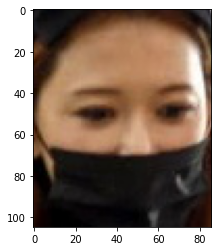

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_100.jpg')
plt.imshow(img)

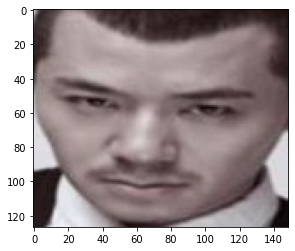

In [18]:
img = mpimg.imread('/content/data/without_mask/without_mask_100.jpg')
plt.imshow(img)

Resizing the images and saving the data in different folder

In [19]:

#creating directories for resized images
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

In [20]:


with_mask_folder =  '/content/data/with_mask/'
with_mask_resized_folder = '/content/with_mask_resized/'


for filename in os.listdir(with_mask_folder):
 
  img_path = with_mask_folder+filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')

  newimgpath = with_mask_resized_folder + filename
  img.save(newimgpath)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
without_mask_folder =  '/content/data/without_mask/'
without_mask_resized_folder = '/content/without_mask_resized/'


for filename in os.listdir(without_mask_folder):
  
  img_path = without_mask_folder+filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')

  newimgpath = without_mask_resized_folder + filename
  img.save(newimgpath)

Resized images

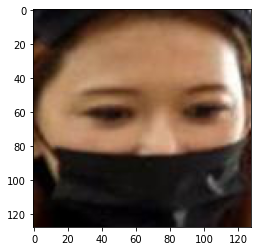

In [22]:
#displaying with mask image
img = mpimg.imread('/content/with_mask_resized/with_mask_100.jpg')
plt.imshow(img)

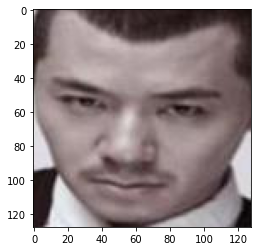

In [23]:
img = mpimg.imread('/content/without_mask_resized/without_mask_100.jpg')
plt.imshow(img)

Converting images to numpy array

In [24]:
import cv2
import glob

In [25]:
imdir = '/content/with_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
with_mask_images = np.asarray([cv2.imread(file) for file in files])

In [26]:
imdir = '/content/without_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(with_mask_images)

[[[[185 187 188]
   [143 145 145]
   [ 87  89  89]
   ...
   [ 91  86  25]
   [ 97  90  27]
   [ 99  92  29]]

  [[190 190 196]
   [163 164 168]
   [117 119 120]
   ...
   [ 93  89  31]
   [ 97  91  32]
   [ 97  91  32]]

  [[197 197 209]
   [189 189 201]
   [161 162 172]
   ...
   [ 83  82  32]
   [ 84  81  30]
   [ 82  79  28]]

  ...

  [[220 209 201]
   [222 210 200]
   [224 210 198]
   ...
   [ 46  55  35]
   [ 45  53  36]
   [ 45  53  36]]

  [[221 209 199]
   [221 209 199]
   [223 209 197]
   ...
   [ 45  54  34]
   [ 45  53  36]
   [ 45  53  36]]

  [[220 208 198]
   [220 208 196]
   [224 208 196]
   ...
   [ 45  54  34]
   [ 45  53  36]
   [ 45  53  36]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [28]:
print(without_mask_images)

[[[[ 14   1   0]
   [ 14   1   0]
   [ 14   1   0]
   ...
   [ 40  26  38]
   [ 42  28  40]
   [ 44  30  42]]

  [[ 14   1   0]
   [ 14   1   0]
   [ 14   1   0]
   ...
   [ 42  28  40]
   [ 44  30  42]
   [ 45  31  43]]

  [[ 13   1   0]
   [ 13   1   0]
   [ 13   1   0]
   ...
   [ 45  31  43]
   [ 46  32  44]
   [ 47  33  45]]

  ...

  [[ 14   0   1]
   [ 14   0   1]
   [ 14   0   1]
   ...
   [ 14   0   1]
   [ 14   0   1]
   [ 14   0   1]]

  [[ 14   0   1]
   [ 14   0   1]
   [ 14   0   1]
   ...
   [ 14   0   1]
   [ 14   0   1]
   [ 14   0   1]]

  [[ 14   0   1]
   [ 14   0   1]
   [ 14   0   1]
   ...
   [ 14   0   1]
   [ 14   0   1]
   [ 14   0   1]]]


 [[[215 235 240]
   [218 238 243]
   [222 242 247]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[213 233 238]
   [217 237 242]
   [221 241 246]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[215 234 239]
   [218 237 242]
   [223 242 247]
   ...
   [253 253 253]
   [253 253 253]
   [253 253

In [29]:
print(with_mask_images.shape)

(3725, 128, 128, 3)


In [30]:
print(without_mask_images.shape)

(3828, 128, 128, 3)


In [31]:
combined_images = np.concatenate((with_mask_images , without_mask_images))

In [32]:
print(combined_images)

[[[[185 187 188]
   [143 145 145]
   [ 87  89  89]
   ...
   [ 91  86  25]
   [ 97  90  27]
   [ 99  92  29]]

  [[190 190 196]
   [163 164 168]
   [117 119 120]
   ...
   [ 93  89  31]
   [ 97  91  32]
   [ 97  91  32]]

  [[197 197 209]
   [189 189 201]
   [161 162 172]
   ...
   [ 83  82  32]
   [ 84  81  30]
   [ 82  79  28]]

  ...

  [[220 209 201]
   [222 210 200]
   [224 210 198]
   ...
   [ 46  55  35]
   [ 45  53  36]
   [ 45  53  36]]

  [[221 209 199]
   [221 209 199]
   [223 209 197]
   ...
   [ 45  54  34]
   [ 45  53  36]
   [ 45  53  36]]

  [[220 208 198]
   [220 208 196]
   [224 208 196]
   ...
   [ 45  54  34]
   [ 45  53  36]
   [ 45  53  36]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [33]:
print(combined_images.shape)

(7553, 128, 128, 3)


In [34]:
#data and labels
X = combined_images
Y = np.asarray(labels)

Train Test Split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print( X.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


In [37]:
print(len(X_train), len(Y_train), len(X_test), len(Y_test))

6042 6042 1511 1511


In [38]:
print(X_train[0])

[[[0 0 0]
  [0 0 0]
  [0 0 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 1 0]
  [0 1 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 1 0]
  [0 1 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 1 0]
  [0 1 0]]]


In [39]:
X_train_std = X_train/255
X_test_std = X_test/255

In [40]:
print(X_train_std[0])

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.00392157]
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.00392157 0.        ]
  [0.         0.00392157 0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


Building the neural network

In [41]:
import tensorflow as tf
import keras


In [42]:
model = keras.Sequential([
                keras.layers.Flatten(input_shape=(128,128,3)),
                keras.layers.Dense(70, activation='relu'),
                keras.layers.Dense(70, activation='relu'),
                keras.layers.Dense(2, activation='sigmoid')
])



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 70)                3440710   
                                                                 
 dense_1 (Dense)             (None, 70)                4970      
                                                                 
 dense_2 (Dense)             (None, 2)                 142       
                                                                 
Total params: 3,445,822
Trainable params: 3,445,822
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train_std, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
170/170 [==============================] - 12s 68ms/step - loss: 1.0343 - acc: 0.7107 - val_loss: 1.0136 - val_acc: 0.6198
Epoch 2/10
170/170 [==============================] - 11s 63ms/step - loss: 0.4126 - acc: 0.8291 - val_loss: 0.7209 - val_acc: 0.7438
Epoch 3/10
170/170 [==============================] - 11s 65ms/step - loss: 0.3880 - acc: 0.8409 - val_loss: 0.3521 - val_acc: 0.8512
Epoch 4/10
170/170 [==============================] - 12s 68ms/step - loss: 0.3640 - acc: 0.8558 - val_loss: 0.4720 - val_acc: 0.8231
Epoch 5/10
170/170 [==============================] - 12s 69ms/step - loss: 0.3165 - acc: 0.8703 - val_loss: 0.2929 - val_acc: 0.8744
Epoch 6/10
170/170 [==============================] - 10s 57ms/step - loss: 0.4090 - acc: 0.8405 - val_loss: 0.4300 - val_acc: 0.8215
Epoch 7/10
170/170 [==============================] - 10s 61ms/step - loss: 0.3495 - acc: 0.8573 - val_loss: 0.3753 - val_acc: 0.8281
Epoch 8/10
170/170 [==============================] - 10s 62ms

In [45]:
Y_pred= model.predict(X_test_std)

48/48 [==============================] - 1s 13ms/step


In [46]:
Y_pred_class = Y_pred.argmax(axis=1)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       768
           1       0.77      0.95      0.85       743

    accuracy                           0.84      1511
   macro avg       0.86      0.84      0.84      1511
weighted avg       0.86      0.84      0.84      1511



Building a predictive system

In [49]:
from google.colab.patches import cv2_imshow


path of the image to be predicred:/content/WIN_20230120_13_20_33_Pro.jpg


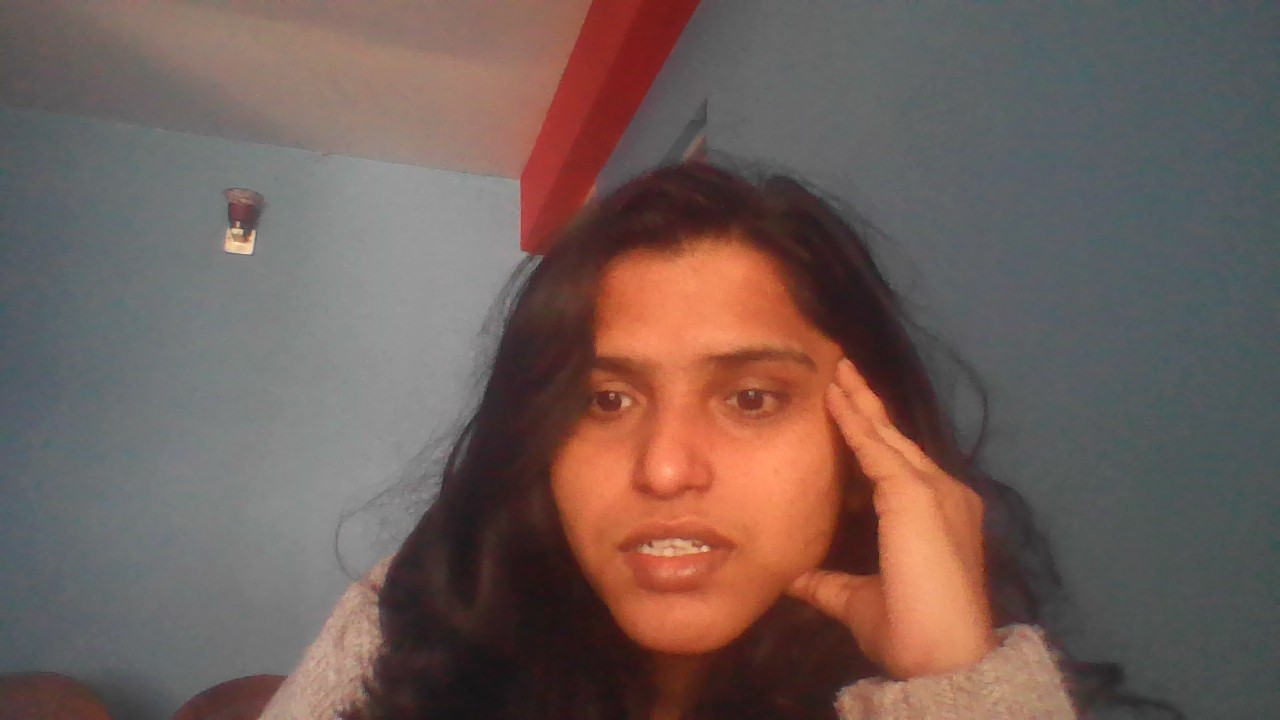

1/1 [==============================] - 0s 43ms/step
The person is not wearing mask


In [56]:
input_image_path = input('path of the image to be predicred:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128, 128))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize, [1,128, 128, 3])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('The person is wearing mask')

else:
  print('The person is not wearing mask')  


path of the image to be predicred:/content/aryan.jpg


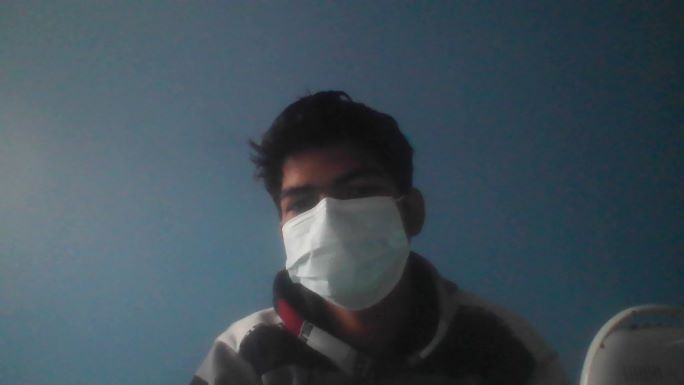

1/1 [==============================] - 0s 31ms/step
The person is wearing mask


In [51]:
input_image_path = input('path of the image to be predicred:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128, 128))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize, [1,128, 128, 3])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('The person is wearing mask')

else:
  print('The person is not wearing mask')  

Saving the model

In [52]:
model.save('face_mask_detection_model.h5')

In [53]:
from keras.models import load_model

In [54]:
loaded_model = load_model('/content/face_mask_detection_model.h5')

In [55]:
loaded_model.predict(X_test)

48/48 [==============================] - 1s 11ms/step


array([[0., 1.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 1.],
       [0., 0.]], dtype=float32)